# Student Questionnaire

In [142]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, precision_recall_curve, PrecisionRecallDisplay

In [2]:
# Student questionnaire data file (takes over 2 minutes to load)
df_student = pd.read_spss("../raw_data/unzipped/CY08MSP_STU_QQQ.SAV")

In [3]:
display(df_student)

,CNT,CNTRYID,CNTSCHID,CNTSTUID,CYC,NatCen,STRATUM,SUBNATIO,REGION,OECD,...,PV3MPRE,PV4MPRE,PV5MPRE,PV6MPRE,PV7MPRE,PV8MPRE,PV9MPRE,PV10MPRE,SENWT,VER_DAT
0,Albania,Albania,800282.0,800001.0,08MS,Albania,ALB - stratum 03: Urban / Center / Public,Albania,Albania,No,...,226.250,203.029,219.817,331.017,223.752,305.671,230.156,289.436,0.55561,03MAY23:10:11:25
1,Albania,Albania,800115.0,800002.0,08MS,Albania,ALB - stratum 03: Urban / Center / Public,Albania,Albania,No,...,298.644,321.405,320.452,284.836,364.565,304.044,347.626,352.269,0.76431,03MAY23:10:11:25
2,Albania,Albania,800242.0,800003.0,08MS,Albania,ALB - stratum 01: Urban / North / Public,Albania,Albania,No,...,383.340,376.019,285.901,289.896,338.469,316.296,324.361,343.351,1.37877,03MAY23:10:11:25
3,Albania,Albania,800245.0,800005.0,08MS,Albania,ALB - stratum 08: Rural / Center / Public,Albania,Albania,No,...,264.532,303.422,327.793,165.575,246.156,238.322,275.860,227.466,1.49361,03MAY23:10:11:26
4,Albania,Albania,800285.0,800006.0,08MS,Albania,ALB - stratum 03: Urban / Center / Public,Albania,Albania,No,...,399.300,514.739,539.850,461.793,514.465,510.462,490.537,503.793,0.65249,03MAY23:10:11:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613739,Uzbekistan,Uzbekistan,86000120.0,86007488.0,08MS,Uzbekistan,UZB - stratum 26: Khorezm/Rural,Uzbekistan,Uzbekistan,No,...,334.153,306.551,271.135,386.969,376.271,368.287,395.329,278.263,0.71987,02MAY23:13:18:15
613740,Uzbekistan,Uzbekistan,86000140.0,86007489.0,08MS,Uzbekistan,UZB - stratum 04: Andijan/Rural,Uzbekistan,Uzbekistan,No,...,272.456,335.952,232.583,179.328,233.470,203.001,254.340,233.187,0.65541,02MAY23:13:18:13
613741,Uzbekistan,Uzbekistan,86000024.0,86007490.0,08MS,Uzbekistan,UZB - stratum 10: Kashkadarya/Rural,Uzbekistan,Uzbekistan,No,...,395.368,451.614,432.586,387.329,456.236,424.790,408.986,460.542,0.67910,02MAY23:13:18:13
613742,Uzbekistan,Uzbekistan,86000174.0,86007491.0,08MS,Uzbekistan,UZB - stratum 16: Samarkand/Rural,Uzbekistan,Uzbekistan,No,...,339.529,272.346,317.838,248.165,405.860,364.173,346.663,341.668,0.68618,02MAY23:13:18:14


In [4]:
print(list(df_student.columns))

['CNT', 'CNTRYID', 'CNTSCHID', 'CNTSTUID', 'CYC', 'NatCen', 'STRATUM', 'SUBNATIO', 'REGION', 'OECD', 'ADMINMODE', 'LANGTEST_QQQ', 'LANGTEST_COG', 'LANGTEST_PAQ', 'Option_CT', 'Option_FL', 'Option_ICTQ', 'Option_WBQ', 'Option_PQ', 'Option_TQ', 'Option_UH', 'BOOKID', 'ST001D01T', 'ST003D02T', 'ST003D03T', 'ST004D01T', 'ST250Q01JA', 'ST250Q02JA', 'ST250Q03JA', 'ST250Q04JA', 'ST250Q05JA', 'ST250D06JA', 'ST250D07JA', 'ST251Q01JA', 'ST251Q02JA', 'ST251Q03JA', 'ST251Q04JA', 'ST251Q06JA', 'ST251Q07JA', 'ST251D08JA', 'ST251D09JA', 'ST253Q01JA', 'ST254Q01JA', 'ST254Q02JA', 'ST254Q03JA', 'ST254Q04JA', 'ST254Q05JA', 'ST254Q06JA', 'ST255Q01JA', 'ST256Q01JA', 'ST256Q02JA', 'ST256Q03JA', 'ST256Q06JA', 'ST256Q07JA', 'ST256Q08JA', 'ST256Q09JA', 'ST256Q10JA', 'ST230Q01JA', 'ST005Q01JA', 'ST006Q01JA', 'ST006Q02JA', 'ST006Q03JA', 'ST006Q04JA', 'ST006Q05JA', 'ST007Q01JA', 'ST008Q01JA', 'ST008Q02JA', 'ST008Q03JA', 'ST008Q04JA', 'ST008Q05JA', 'ST258Q01JA', 'ST259Q01JA', 'ST259Q02JA', 'ST019AQ01T', 'ST019BQ01

In [13]:
# CONVERT to numerical
columns = [
    "CREATEFF", # Creative self-efficacy (WLE)
    "CREATSCH", # Creative school and class environment (WLE)
    "CREATFAM", # Creative peers and family environment (WLE)
    "CREATAS", # Creative Activities at school (WLE)
    "CREATOOS", # Creative Activities outside of school (WLE)
    "CREATOP", # Creativity and Openness to Intellect TBD (WLE)
    "CREATHME", # Creative Home Environment (WLE)
    "CREATACT", # Participation in creative activities outside of school (WLE)
    "CREATOPN", # Creativity and Openness to Intellect (WLE)
    "CREATOR", # Openness to creativity: Other’s report (WLE)
    "MATHEFF",
    "MATHEF21",
    "MATHPERS"
]

for col in columns:
    number_of_filled_columns = df_student[col].count()
    s_temp = pd.to_numeric(df_student[col], errors='coerce')
    number_of_filled_columns_post = s_temp.count()
    assert number_of_filled_columns == number_of_filled_columns_post, f"In converting {col}, got {number_of_filled_columns_post} NaNs != {number_of_filled_columns} NaNs"
    df_student[col] = s_temp

In [14]:
# CONVERT to categorical
columns = [
    "CNTSCHID", # Intl. School ID
    "CNTSTUID", # Student ID
    "CYC", # PISA Assessment Cycle (2 digits + 2 character Assessment type - MS/FT)
    "VER_DAT", # Date of the database creation
]

for col in columns:
    df_student[col] = df_student[col].astype('category')

In [15]:
df = df_student[[
    'CNT', 'CNTSCHID', 'CNTSTUID', 
    'Option_CT', 'Option_FL', 'Option_ICTQ', 'Option_WBQ', 'Option_PQ', 'Option_TQ', 'Option_UH', 
    'PV1MATH', # 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH',
    'PV1READ', # 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ',
    'PV1SCIE', # 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE', 
    'MATHPREF', # Preference of Math over other core subjects
    'MATHEASE', # Perception of Mathematics as easier than other subjects
    'MATHMOT', # Motivation to do well in mathematics 
    "CREATEFF", "CREATSCH", "CREATFAM", "CREATAS", "CREATOOS", "CREATOP", "CREATHME", "CREATACT", "CREATOPN", "CREATOR", 
    "ST004D01T", # Student (Standardized) Gender
    "ST250Q01JA", # Which of the following are in your [home]: A room of your own
    "ST250Q02JA", # Which of the following are in your [home]: A computer (laptop, desktop, or tablet) that you can use for school work
    "ST250Q03JA", # Which of the following are in your [home]: Educational Software or Apps
    "ST250Q04JA", # Which of the following are in your [home]: Your own [cell phone] with Internet access (e.g. smartphone)
    "ST250Q05JA", # Which of the following are in your [home]: Internet access (e.g. Wi-fi) (excluding through smartphones)
    "MATHEFF",
    "MATHEF21",
    "MATHPERS"
]]

In [16]:
df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613744 entries, 0 to 613743
Data columns (total 35 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   CNT          613744 non-null  category
 1   CNTSCHID     613744 non-null  category
 2   CNTSTUID     613744 non-null  category
 3   Option_CT    613744 non-null  category
 4   Option_FL    613744 non-null  category
 5   Option_ICTQ  613744 non-null  category
 6   Option_WBQ   613744 non-null  category
 7   Option_PQ    613744 non-null  category
 8   Option_TQ    613744 non-null  category
 9   Option_UH    613744 non-null  category
 10  PV1MATH      613744 non-null  float64 
 11  PV1READ      613744 non-null  float64 
 12  PV1SCIE      613744 non-null  float64 
 13  MATHPREF     509150 non-null  category
 14  MATHEASE     506482 non-null  category
 15  MATHMOT      506539 non-null  category
 16  CREATEFF     464114 non-null  float64 
 17  CREATSCH     462428 non-null  float64 
 18  CREA

In [18]:
df.describe(include=['category'])

,CNT,CNTSCHID,CNTSTUID,Option_CT,Option_FL,Option_ICTQ,Option_WBQ,Option_PQ,Option_TQ,Option_UH,MATHPREF,MATHEASE,MATHMOT,ST004D01T,ST250Q01JA,ST250Q02JA,ST250Q03JA,ST250Q04JA,ST250Q05JA
count,613744,613744.0,613744.0,613744,613744,613744,613744,613744,613744,613744,509150,506482,506539,613665,580227,583643,577205,585263,582810
unique,80,21629.0,613744.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,Spain,49900035.0,86007492.0,Yes,No,Yes,No,No,No,No,No preference for mathematics over other subjects,No perception of mathematics as easier than ot...,Not more motivated to do well in mathematics t...,Male,Yes,Yes,Yes,Yes,Yes
freq,30800,475.0,1.0,499843,416428,393607,478396,498537,468692,508796,445844,453971,480018,307906,459439,480021,413380,554885,525842


In [19]:
df.groupby(['Option_CT', 'Option_WBQ']).agg({i:"value_counts" for i in ['Option_PQ', 'Option_TQ', 'Option_UH']})

/tmp/ipykernel_1119578/1419215504.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Option_CT', 'Option_WBQ']).agg({i:"value_counts" for i in ['Option_PQ', 'Option_TQ', 'Option_UH']})


Option_PQ  Option_TQ  Option_UH
Option_CT Option_WBQ                                     
No        No         No      101749      95722      97629
                     Yes       6583      12610      10703
          Yes        Yes       5569          0          0
                     No           0       5569       5569
Yes       No         No      305683     293968     298381
                     Yes      64381      76096      71683
          Yes        No       91105      73433     107217
                     Yes      38674      56346      22562

/tmp/ipykernel_1119578/854411176.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['ST004D01T', 'ST250Q01JA']).agg({i:"value_counts" for i in ['ST250Q02JA', 'ST250Q03JA', 'ST250Q04JA', 'ST250Q05JA']}).plot.bar()


<Axes: xlabel='ST004D01T,ST250Q01JA,None'>

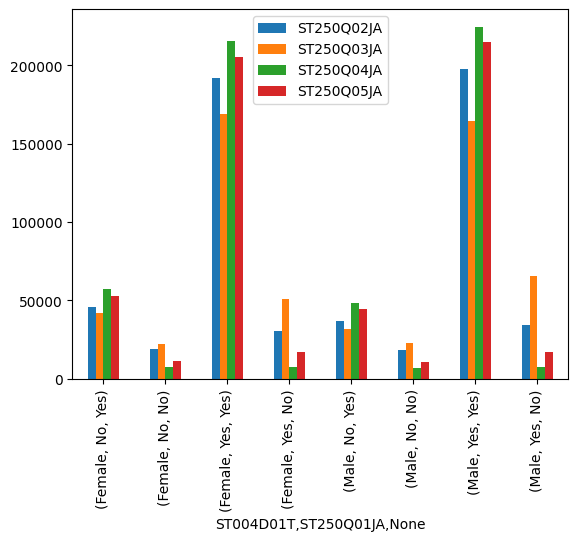

In [20]:
df.groupby(['ST004D01T', 'ST250Q01JA']).agg({i:"value_counts" for i in ['ST250Q02JA', 'ST250Q03JA', 'ST250Q04JA', 'ST250Q05JA']}).plot.bar()

In [21]:
df.describe(include=["float64"])

,PV1MATH,PV1READ,PV1SCIE,CREATEFF,CREATSCH,CREATFAM,CREATAS,CREATOOS,CREATOP,CREATHME,CREATACT,CREATOPN,CREATOR,MATHEFF,MATHEF21,MATHPERS
count,613744.000000,613744.000000,613744.000000,464114.000000,462428.000000,457538.000000,417643.000000,399028.000000,461832.000000,89879.000000,69982.000000,89488.000000,89738.000000,469513.000000,487420.000000,502608.000000
mean,440.874665,438.224714,450.462455,0.023278,0.132584,0.021483,0.223822,0.280381,0.074527,-0.031006,0.233126,0.029012,0.042998,-0.426851,0.043277,0.008285
std,101.840726,109.507625,105.243625,1.023141,1.053093,1.028585,1.095256,1.130637,1.019361,1.002098,1.114992,0.998916,1.006864,1.202573,1.014647,1.068889
min,0.000000,0.000000,0.000000,-2.978300,-2.623400,-2.789000,-2.075600,-0.820500,-3.141400,-4.133800,-0.914300,-4.470800,-3.828700,-3.849000,-2.694300,-3.468200
25%,364.325000,357.226750,371.712000,-0.610500,-0.548500,-0.656600,-0.568500,-0.810500,-0.553825,-0.682900,-0.914300,-0.617700,-0.610600,-1.078400,-0.553100,-0.573900
50%,433.056000,434.961500,444.464000,0.019900,0.068400,-0.050400,0.231400,0.109000,0.032000,-0.175900,0.153100,-0.025700,-0.057600,-0.430300,0.031200,-0.085800
75%,511.177000,516.484250,524.734250,0.418800,0.521800,0.520600,0.819000,0.998200,0.436800,0.461150,1.015900,0.554700,0.579300,0.072800,0.694900,0.507800
max,943.041000,938.681000,895.375000,2.571900,2.813900,2.239400,8.629000,4.799400,3.530600,3.659700,6.567300,3.490600,3.238200,2.855100,2.952600,3.115000


## Quick Analysis

In [22]:
temp = df.groupby(['MATHPREF', 'MATHEASE', 'MATHMOT']).agg({i:"mean" for i in ['PV1MATH', 'PV1SCIE', 'PV1READ']})
temp.style.background_gradient(cmap='Blues', axis=None)

/tmp/ipykernel_1119578/4256950056.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp = df.groupby(['MATHPREF', 'MATHEASE', 'MATHMOT']).agg({i:"mean" for i in ['PV1MATH', 'PV1SCIE', 'PV1READ']})


In [23]:
temp = df.groupby(['MATHMOT']).agg({i:"mean" for i in ['PV1MATH', 'PV1SCIE', 'PV1READ']})
temp.style.background_gradient(cmap='Blues', axis=None)

/tmp/ipykernel_1119578/3943326471.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp = df.groupby(['MATHMOT']).agg({i:"mean" for i in ['PV1MATH', 'PV1SCIE', 'PV1READ']})


,PV1MATH,PV1SCIE,PV1READ
MATHMOT,,,
More motivated to do well in mathematics than other subjects,459.211584,460.618549,440.489035
Not more motivated to do well in mathematics than other subjects,453.035018,463.273661,452.062206


In [24]:
quick_analysis_df = df[
    [
        'PV1MATH', 'MATHPREF', 'MATHEASE', 'MATHMOT',
    ]].dropna()
quick_analysis_df

,PV1MATH,MATHPREF,MATHEASE,MATHMOT
0,179.583,No preference for mathematics over other subjects,No perception of mathematics as easier than ot...,Not more motivated to do well in mathematics t...
3,272.649,No preference for mathematics over other subjects,No perception of mathematics as easier than ot...,Not more motivated to do well in mathematics t...
4,435.473,No preference for mathematics over other subjects,No perception of mathematics as easier than ot...,Not more motivated to do well in mathematics t...
5,534.112,No preference for mathematics over other subjects,No perception of mathematics as easier than ot...,Not more motivated to do well in mathematics t...
6,381.584,No preference for mathematics over other subjects,No perception of mathematics as easier than ot...,Not more motivated to do well in mathematics t...
...,...,...,...,...
613736,464.923,No preference for mathematics over other subjects,No perception of mathematics as easier than ot...,Not more motivated to do well in mathematics t...
613739,300.530,No preference for mathematics over other subjects,No perception of mathematics as easier than ot...,Not more motivated to do well in mathematics t...
613741,420.221,No preference for mathematics over other subjects,No perception of mathematics as easier than ot...,Not more motivated to do well in mathematics t...
613742,343.129,No preference for mathematics over other subjects,No perception of mathematics as easier than ot...,Not more motivated to do well in mathematics t...


In [25]:
quick_analysis_df

,PV1MATH,MATHPREF,MATHEASE,MATHMOT
0,179.583,No preference for mathematics over other subjects,No perception of mathematics as easier than ot...,Not more motivated to do well in mathematics t...
3,272.649,No preference for mathematics over other subjects,No perception of mathematics as easier than ot...,Not more motivated to do well in mathematics t...
4,435.473,No preference for mathematics over other subjects,No perception of mathematics as easier than ot...,Not more motivated to do well in mathematics t...
5,534.112,No preference for mathematics over other subjects,No perception of mathematics as easier than ot...,Not more motivated to do well in mathematics t...
6,381.584,No preference for mathematics over other subjects,No perception of mathematics as easier than ot...,Not more motivated to do well in mathematics t...
...,...,...,...,...
613736,464.923,No preference for mathematics over other subjects,No perception of mathematics as easier than ot...,Not more motivated to do well in mathematics t...
613739,300.530,No preference for mathematics over other subjects,No perception of mathematics as easier than ot...,Not more motivated to do well in mathematics t...
613741,420.221,No preference for mathematics over other subjects,No perception of mathematics as easier than ot...,Not more motivated to do well in mathematics t...
613742,343.129,No preference for mathematics over other subjects,No perception of mathematics as easier than ot...,Not more motivated to do well in mathematics t...


In [26]:
quick_analysis_df['PV1MATH']

0         179.583
3         272.649
4         435.473
5         534.112
6         381.584
           ...   
613736    464.923
613739    300.530
613741    420.221
613742    343.129
613743    350.056
Name: PV1MATH, Length: 501353, dtype: float64

In [27]:
X = quick_analysis_df.drop(['PV1MATH'], axis=1)
y = pd.to_numeric(quick_analysis_df['PV1MATH'] > 420, errors='coerce')

In [28]:
y.value_counts()

PV1MATH
True     301990
False    199363
Name: count, dtype: int64

In [29]:
X["MATHPREF"].value_counts() / len(X)

MATHPREF
No preference for mathematics over other subjects    0.875736
Preference for mathematics over other subjects       0.124264
Name: count, dtype: float64

In [30]:
X["MATHEASE"].value_counts() / len(X)

MATHEASE
No perception of mathematics as easier than other subjects    0.896773
Perception of mathematics as easier than other subjects       0.103227
Name: count, dtype: float64

In [31]:
X["MATHMOT"].value_counts() / len(X)

MATHMOT
Not more motivated to do well in mathematics than other subjects    0.948226
More motivated to do well in mathematics than other subjects        0.051774
Name: count, dtype: float64

In [32]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [33]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((335906, 3), (165447, 3))

In [34]:
# import category encoders

import category_encoders as ce

In [35]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['MATHPREF', 'MATHEASE', 'MATHMOT'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [36]:
X_train.size

1007718

In [37]:
for column in ['MATHPREF', 'MATHEASE', 'MATHMOT']:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'MATHPREF': ['No preference for mathematics over other subj..., NaN, 'Preference for mathematics over other subjects']
Categories (2, object): ['No preference for mathematics over other subj..., 'Preference for mathematics over other subjects']
Unique values in column 'MATHEASE': ['No perception of mathematics as easier than o..., NaN, 'Perception of mathematics as easier than othe...]
Categories (2, object): ['No perception of mathematics as easier than o..., 'Perception of mathematics as easier than othe...]
Unique values in column 'MATHMOT': ['Not more motivated to do well in mathematics ..., NaN, 'More motivated to do well in mathematics than...]
Categories (2, object): ['More motivated to do well in mathematics than..., 'Not more motivated to do well in mathematics ...]


In [38]:
X_train.head()

,MATHPREF,MATHEASE,MATHMOT
466510,1,1,1
608031,1,2,1
358265,1,2,1
212359,2,2,1
106746,1,2,1


In [39]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.6025


In [40]:
# view the feature scores

feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

MATHPREF    0.581765
MATHEASE    0.388147
MATHMOT     0.030088
dtype: float64

In [41]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 1775 63967]
 [ 1796 97909]]


## Other

In [42]:
c = df.select_dtypes(include=["float64"]).corr().abs()
c.loc[:,:] = np.tril(c.values, k=-1)
c = c[c>0]

s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
so

PV1MATH   PV1SCIE     0.888860
PV1READ   PV1SCIE     0.837143
PV1MATH   PV1READ     0.831251
CREATAS   CREATOOS    0.750998
MATHEFF   MATHEF21    0.649422
                        ...   
MATHPERS  CREATOPN         NaN
          CREATOR          NaN
          MATHEFF          NaN
          MATHEF21         NaN
          MATHPERS         NaN
Length: 256, dtype: float64

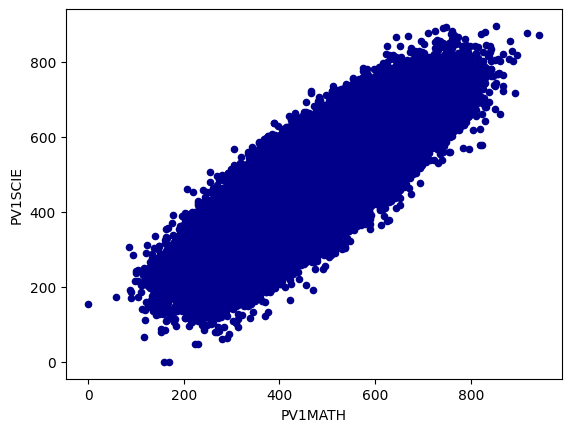

In [43]:
ax1 = df.plot.scatter(x='PV1MATH', y='PV1SCIE', c='DarkBlue')

Text(0.5, 1.0, 'PV1MATH')

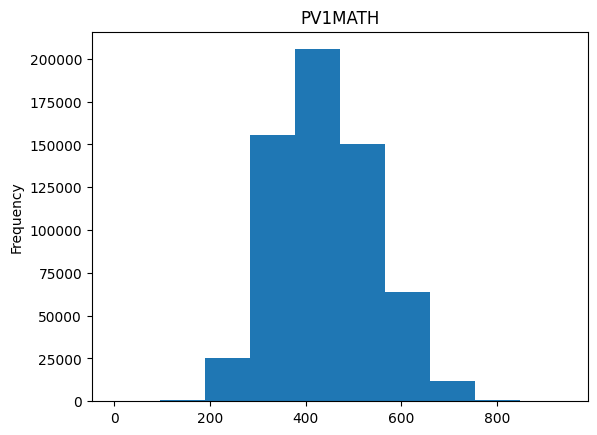

In [44]:
ax1 = df['PV1MATH'].plot.hist()
plt.title('PV1MATH')

<Axes: >

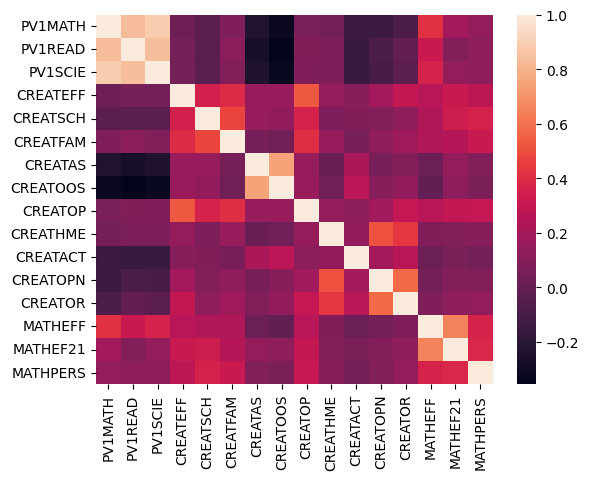

In [45]:
c = df.select_dtypes(include=["float64"]).corr()
sns.heatmap(c)

In [46]:
df.select_dtypes(include=["float64"]).describe()

,PV1MATH,PV1READ,PV1SCIE,CREATEFF,CREATSCH,CREATFAM,CREATAS,CREATOOS,CREATOP,CREATHME,CREATACT,CREATOPN,CREATOR,MATHEFF,MATHEF21,MATHPERS
count,613744.000000,613744.000000,613744.000000,464114.000000,462428.000000,457538.000000,417643.000000,399028.000000,461832.000000,89879.000000,69982.000000,89488.000000,89738.000000,469513.000000,487420.000000,502608.000000
mean,440.874665,438.224714,450.462455,0.023278,0.132584,0.021483,0.223822,0.280381,0.074527,-0.031006,0.233126,0.029012,0.042998,-0.426851,0.043277,0.008285
std,101.840726,109.507625,105.243625,1.023141,1.053093,1.028585,1.095256,1.130637,1.019361,1.002098,1.114992,0.998916,1.006864,1.202573,1.014647,1.068889
min,0.000000,0.000000,0.000000,-2.978300,-2.623400,-2.789000,-2.075600,-0.820500,-3.141400,-4.133800,-0.914300,-4.470800,-3.828700,-3.849000,-2.694300,-3.468200
25%,364.325000,357.226750,371.712000,-0.610500,-0.548500,-0.656600,-0.568500,-0.810500,-0.553825,-0.682900,-0.914300,-0.617700,-0.610600,-1.078400,-0.553100,-0.573900
50%,433.056000,434.961500,444.464000,0.019900,0.068400,-0.050400,0.231400,0.109000,0.032000,-0.175900,0.153100,-0.025700,-0.057600,-0.430300,0.031200,-0.085800
75%,511.177000,516.484250,524.734250,0.418800,0.521800,0.520600,0.819000,0.998200,0.436800,0.461150,1.015900,0.554700,0.579300,0.072800,0.694900,0.507800
max,943.041000,938.681000,895.375000,2.571900,2.813900,2.239400,8.629000,4.799400,3.530600,3.659700,6.567300,3.490600,3.238200,2.855100,2.952600,3.115000


In [47]:
creat_df = df.loc[:, df.columns.str.startswith('CREAT')]

In [48]:
creat_df

,CREATEFF,CREATSCH,CREATFAM,CREATAS,CREATOOS,CREATOP,CREATHME,CREATACT,CREATOPN,CREATOR
0,2.4021,0.0590,0.8155,4.1226,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.4909,-0.3010,-1.0261,1.0191,1.4468,-0.5423,NaN,NaN,NaN,NaN
4,-0.7475,-0.1405,-0.9293,1.6583,1.8557,0.9322,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
613739,2.1524,0.5032,-0.0326,NaN,NaN,-0.4280,NaN,NaN,NaN,NaN
613740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
613741,0.0846,0.5352,-0.5679,0.4911,0.6097,0.4185,NaN,NaN,NaN,NaN
613742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
math_df = df[['MATHEFF', 'MATHEF21', 'MATHPERS']]
math_df

,MATHEFF,MATHEF21,MATHPERS
0,-1.4413,NaN,-0.0085
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,-1.3156,2.2322,-0.2546
4,-0.5867,0.9425,-0.1735
...,...,...,...
613739,2.2815,2.3441,2.2393
613740,NaN,NaN,NaN
613741,0.3926,0.9997,0.6311
613742,-0.1652,2.4215,NaN


In [50]:
creat_df = creat_df.join(math_df)

In [51]:
for column in creat_df.columns:
    creat_df[f'{column}_is_nan'] = creat_df[column].isna().astype(int)

creat_df.describe()

,CREATEFF,CREATSCH,CREATFAM,CREATAS,CREATOOS,CREATOP,CREATHME,CREATACT,CREATOPN,CREATOR,...,CREATAS_is_nan,CREATOOS_is_nan,CREATOP_is_nan,CREATHME_is_nan,CREATACT_is_nan,CREATOPN_is_nan,CREATOR_is_nan,MATHEFF_is_nan,MATHEF21_is_nan,MATHPERS_is_nan
count,464114.000000,462428.000000,457538.000000,417643.000000,399028.000000,461832.000000,89879.000000,69982.000000,89488.000000,89738.000000,...,613744.000000,613744.000000,613744.000000,613744.000000,613744.000000,613744.000000,613744.000000,613744.000000,613744.000000,613744.000000
mean,0.023278,0.132584,0.021483,0.223822,0.280381,0.074527,-0.031006,0.233126,0.029012,0.042998,...,0.319516,0.349846,0.247517,0.853556,0.885975,0.854193,0.853786,0.235002,0.205825,0.181079
std,1.023141,1.053093,1.028585,1.095256,1.130637,1.019361,1.002098,1.114992,0.998916,1.006864,...,0.466289,0.476922,0.431570,0.353551,0.317842,0.352913,0.353321,0.424000,0.404304,0.385084
min,-2.978300,-2.623400,-2.789000,-2.075600,-0.820500,-3.141400,-4.133800,-0.914300,-4.470800,-3.828700,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.610500,-0.548500,-0.656600,-0.568500,-0.810500,-0.553825,-0.682900,-0.914300,-0.617700,-0.610600,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,0.019900,0.068400,-0.050400,0.231400,0.109000,0.032000,-0.175900,0.153100,-0.025700,-0.057600,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.418800,0.521800,0.520600,0.819000,0.998200,0.436800,0.461150,1.015900,0.554700,0.579300,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,2.571900,2.813900,2.239400,8.629000,4.799400,3.530600,3.659700,6.567300,3.490600,3.238200,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
creat_df.head()

,CREATEFF,CREATSCH,CREATFAM,CREATAS,CREATOOS,CREATOP,CREATHME,CREATACT,CREATOPN,CREATOR,...,CREATAS_is_nan,CREATOOS_is_nan,CREATOP_is_nan,CREATHME_is_nan,CREATACT_is_nan,CREATOPN_is_nan,CREATOR_is_nan,MATHEFF_is_nan,MATHEF21_is_nan,MATHPERS_is_nan
0,2.4021,0.0590,0.8155,4.1226,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,1,1,1,1,1,0,1,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,1,1,1,1,1,1,1,1
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,1,1,1,1,1,1,1,1
3,-0.4909,-0.3010,-1.0261,1.0191,1.4468,-0.5423,NaN,NaN,NaN,NaN,...,0,0,0,1,1,1,1,0,0,0
4,-0.7475,-0.1405,-0.9293,1.6583,1.8557,0.9322,NaN,NaN,NaN,NaN,...,0,0,0,1,1,1,1,0,0,0


In [53]:
creat_df.fillna(creat_df.median(), inplace=True)
creat_df.head()

,CREATEFF,CREATSCH,CREATFAM,CREATAS,CREATOOS,CREATOP,CREATHME,CREATACT,CREATOPN,CREATOR,...,CREATAS_is_nan,CREATOOS_is_nan,CREATOP_is_nan,CREATHME_is_nan,CREATACT_is_nan,CREATOPN_is_nan,CREATOR_is_nan,MATHEFF_is_nan,MATHEF21_is_nan,MATHPERS_is_nan
0,2.4021,0.0590,0.8155,4.1226,0.1090,0.0320,-0.1759,0.1531,-0.0257,-0.0576,...,0,1,1,1,1,1,1,0,1,0
1,0.0199,0.0684,-0.0504,0.2314,0.1090,0.0320,-0.1759,0.1531,-0.0257,-0.0576,...,1,1,1,1,1,1,1,1,1,1
2,0.0199,0.0684,-0.0504,0.2314,0.1090,0.0320,-0.1759,0.1531,-0.0257,-0.0576,...,1,1,1,1,1,1,1,1,1,1
3,-0.4909,-0.3010,-1.0261,1.0191,1.4468,-0.5423,-0.1759,0.1531,-0.0257,-0.0576,...,0,0,0,1,1,1,1,0,0,0
4,-0.7475,-0.1405,-0.9293,1.6583,1.8557,0.9322,-0.1759,0.1531,-0.0257,-0.0576,...,0,0,0,1,1,1,1,0,0,0


In [54]:
pref_cols=['MATHPREF', 'MATHEASE', 'MATHMOT']
pref_df = df[pref_cols]
pref_df

,MATHPREF,MATHEASE,MATHMOT
0,No preference for mathematics over other subjects,No perception of mathematics as easier than ot...,Not more motivated to do well in mathematics t...
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,No preference for mathematics over other subjects,No perception of mathematics as easier than ot...,Not more motivated to do well in mathematics t...
4,No preference for mathematics over other subjects,No perception of mathematics as easier than ot...,Not more motivated to do well in mathematics t...
...,...,...,...
613739,No preference for mathematics over other subjects,No perception of mathematics as easier than ot...,Not more motivated to do well in mathematics t...
613740,NaN,NaN,NaN
613741,No preference for mathematics over other subjects,No perception of mathematics as easier than ot...,Not more motivated to do well in mathematics t...
613742,No preference for mathematics over other subjects,No perception of mathematics as easier than ot...,Not more motivated to do well in mathematics t...


In [55]:
columns = pref_df.columns
for col in columns:
    # Create dummies for each categorical column
    dummies = pd.get_dummies(pref_df[col], prefix=col, dummy_na=True)

    # Convert True/False to 0/1
    dummies = dummies.astype(int)
    
    # Join the dummies back to the original DataFrame
    pref_df = pref_df.join(dummies)

# Drop original categorical columns
pref_df.drop(columns=columns, inplace=True)

In [56]:
pref_df

,MATHPREF_No preference for mathematics over other subjects,MATHPREF_Preference for mathematics over other subjects,MATHPREF_nan,MATHEASE_No perception of mathematics as easier than other subjects,MATHEASE_Perception of mathematics as easier than other subjects,MATHEASE_nan,MATHMOT_More motivated to do well in mathematics than other subjects,MATHMOT_Not more motivated to do well in mathematics than other subjects,MATHMOT_nan
0,1,0,0,1,0,0,0,1,0
1,0,0,1,0,0,1,0,0,1
2,0,0,1,0,0,1,0,0,1
3,1,0,0,1,0,0,0,1,0
4,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
613739,1,0,0,1,0,0,0,1,0
613740,0,0,1,0,0,1,0,0,1
613741,1,0,0,1,0,0,0,1,0
613742,1,0,0,1,0,0,0,1,0


In [57]:
creat_df

,CREATEFF,CREATSCH,CREATFAM,CREATAS,CREATOOS,CREATOP,CREATHME,CREATACT,CREATOPN,CREATOR,...,CREATAS_is_nan,CREATOOS_is_nan,CREATOP_is_nan,CREATHME_is_nan,CREATACT_is_nan,CREATOPN_is_nan,CREATOR_is_nan,MATHEFF_is_nan,MATHEF21_is_nan,MATHPERS_is_nan
0,2.4021,0.0590,0.8155,4.1226,0.1090,0.0320,-0.1759,0.1531,-0.0257,-0.0576,...,0,1,1,1,1,1,1,0,1,0
1,0.0199,0.0684,-0.0504,0.2314,0.1090,0.0320,-0.1759,0.1531,-0.0257,-0.0576,...,1,1,1,1,1,1,1,1,1,1
2,0.0199,0.0684,-0.0504,0.2314,0.1090,0.0320,-0.1759,0.1531,-0.0257,-0.0576,...,1,1,1,1,1,1,1,1,1,1
3,-0.4909,-0.3010,-1.0261,1.0191,1.4468,-0.5423,-0.1759,0.1531,-0.0257,-0.0576,...,0,0,0,1,1,1,1,0,0,0
4,-0.7475,-0.1405,-0.9293,1.6583,1.8557,0.9322,-0.1759,0.1531,-0.0257,-0.0576,...,0,0,0,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613739,2.1524,0.5032,-0.0326,0.2314,0.1090,-0.4280,-0.1759,0.1531,-0.0257,-0.0576,...,1,1,0,1,1,1,1,0,0,0
613740,0.0199,0.0684,-0.0504,0.2314,0.1090,0.0320,-0.1759,0.1531,-0.0257,-0.0576,...,1,1,1,1,1,1,1,1,1,1
613741,0.0846,0.5352,-0.5679,0.4911,0.6097,0.4185,-0.1759,0.1531,-0.0257,-0.0576,...,0,0,0,1,1,1,1,0,0,0
613742,0.0199,0.0684,-0.0504,0.2314,0.1090,0.0320,-0.1759,0.1531,-0.0257,-0.0576,...,1,1,1,1,1,1,1,0,0,1


In [58]:
features = pref_df.join(creat_df)
features.head()

,MATHPREF_No preference for mathematics over other subjects,MATHPREF_Preference for mathematics over other subjects,MATHPREF_nan,MATHEASE_No perception of mathematics as easier than other subjects,MATHEASE_Perception of mathematics as easier than other subjects,MATHEASE_nan,MATHMOT_More motivated to do well in mathematics than other subjects,MATHMOT_Not more motivated to do well in mathematics than other subjects,MATHMOT_nan,CREATEFF,...,CREATAS_is_nan,CREATOOS_is_nan,CREATOP_is_nan,CREATHME_is_nan,CREATACT_is_nan,CREATOPN_is_nan,CREATOR_is_nan,MATHEFF_is_nan,MATHEF21_is_nan,MATHPERS_is_nan
0,1,0,0,1,0,0,0,1,0,2.4021,...,0,1,1,1,1,1,1,0,1,0
1,0,0,1,0,0,1,0,0,1,0.0199,...,1,1,1,1,1,1,1,1,1,1
2,0,0,1,0,0,1,0,0,1,0.0199,...,1,1,1,1,1,1,1,1,1,1
3,1,0,0,1,0,0,0,1,0,-0.4909,...,0,0,0,1,1,1,1,0,0,0
4,1,0,0,1,0,0,0,1,0,-0.7475,...,0,0,0,1,1,1,1,0,0,0


In [59]:
labels = df['PV1MATH']

In [60]:
labels.describe()

count    613744.000000
mean        440.874665
std         101.840726
min           0.000000
25%         364.325000
50%         433.056000
75%         511.177000
max         943.041000
Name: PV1MATH, dtype: float64

In [61]:
labels

0         179.583
1         308.247
2         267.514
3         272.649
4         435.473
           ...   
613739    300.530
613740    265.080
613741    420.221
613742    343.129
613743    350.056
Name: PV1MATH, Length: 613744, dtype: float64

In [62]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.20, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

In [63]:
len(X_train), len(X_val), len(X_test)

(490995, 61374, 61375)

In [64]:
X_train.isna().sum()

MATHPREF_No preference for mathematics over other subjects                  0
MATHPREF_Preference for mathematics over other subjects                     0
MATHPREF_nan                                                                0
MATHEASE_No perception of mathematics as easier than other subjects         0
MATHEASE_Perception of mathematics as easier than other subjects            0
MATHEASE_nan                                                                0
MATHMOT_More motivated to do well in mathematics than other subjects        0
MATHMOT_Not more motivated to do well in mathematics than other subjects    0
MATHMOT_nan                                                                 0
CREATEFF                                                                    0
CREATSCH                                                                    0
CREATFAM                                                                    0
CREATAS                                                         

In [65]:
pv1math_mean = y_train.mean()
pv1math_std = y_train.std()

In [66]:
y_train_normalized = (y_train - pv1math_mean ) / pv1math_std
y_val_normalized = (y_val - pv1math_mean ) / pv1math_std
y_test_normalized = (y_test - pv1math_mean ) / pv1math_std

In [67]:
y_train_normalized, y_val_normalized, y_test_normalized

(65793    -0.376364
 13287    -1.428031
 211415   -0.991867
 110251    0.365956
 94335     0.541671
             ...   
 110268   -0.968198
 259178    0.858649
 365838   -0.223394
 131932    0.259970
 121958   -0.334232
 Name: PV1MATH, Length: 490995, dtype: float64,
 360171    0.166593
 260453   -1.421362
 240077   -1.126815
 323413    0.725891
 2806     -0.075737
             ...   
 348467    1.913646
 282848    1.996848
 365280   -1.732104
 239985   -1.041609
 386538    2.116938
 Name: PV1MATH, Length: 61374, dtype: float64,
 534530    0.997487
 89959     0.549066
 526123    1.298821
 276057   -1.282692
 43507     0.169284
             ...   
 147973    0.676531
 39687    -1.821013
 562380    0.114306
 555161   -0.332209
 459510   -0.382148
 Name: PV1MATH, Length: 61375, dtype: float64)

In [68]:
import torch
import torch.nn.functional as F

In [69]:
def single_epoch(e, train:bool, model, opt, X, y, batch_size, device):
    losses = []
    iter = tqdm(range(0, len(X), batch_size))
    for i in iter:
        x = torch.FloatTensor(X[i : i + batch_size].to_numpy()).to(device)
        y_true = torch.FloatTensor(y[i : i + batch_size].to_numpy()).to(device)
        y_pred = model(x)
        loss = F.mse_loss(input=y_true, target=y_pred.squeeze())

        if train:
            opt.zero_grad()
            loss.backward()
            opt.step()
        losses.append(loss.item())
        iter.set_description(desc=f'Epoch: {e} | loss: {loss.item()}.', refresh=True)
    
    return np.mean(losses), model, opt

In [70]:
def predict(model, X, batch_size, device):
    model.eval()
    preds = []
    iter = tqdm(range(0, len(X), batch_size))
    for i in iter:
        x = torch.FloatTensor(X[i : i + batch_size].to_numpy()).to(device)
        with torch.no_grad():
            preds.append(model(x))

    return torch.cat(preds, dim=0).squeeze()

Epoch: 0 | loss: 0.6335541009902954.: 100%|██████████| 959/959 [00:18<00:00, 51.55it/s]


Epoch: 0 | Avg. train loss: 0.6950978963044439.


Epoch: 0 | loss: 0.6326345801353455.: 100%|██████████| 120/120 [00:02<00:00, 54.31it/s]


Epoch: 0 | Avg. val loss: 0.651165080567201.


Epoch: 1 | loss: 0.6274409890174866.: 100%|██████████| 959/959 [00:18<00:00, 51.87it/s]


Epoch: 1 | Avg. train loss: 0.6399346931883143.


Epoch: 1 | loss: 0.6215975284576416.: 100%|██████████| 120/120 [00:02<00:00, 55.62it/s]


Epoch: 1 | Avg. val loss: 0.6359679713845253.


Epoch: 2 | loss: 0.6252106428146362.: 100%|██████████| 959/959 [00:18<00:00, 51.53it/s]


Epoch: 2 | Avg. train loss: 0.6304862156152974.


Epoch: 2 | loss: 0.6180607676506042.: 100%|██████████| 120/120 [00:02<00:00, 54.25it/s]


Epoch: 2 | Avg. val loss: 0.6307306672135989.


Epoch: 3 | loss: 0.6236822009086609.: 100%|██████████| 959/959 [00:18<00:00, 52.17it/s]


Epoch: 3 | Avg. train loss: 0.6263516941831309.


Epoch: 3 | loss: 0.6169663071632385.: 100%|██████████| 120/120 [00:02<00:00, 55.93it/s]


Epoch: 3 | Avg. val loss: 0.6280256296197574.


Epoch: 4 | loss: 0.6222984790802002.: 100%|██████████| 959/959 [00:18<00:00, 51.32it/s]


Epoch: 4 | Avg. train loss: 0.6238400481167377.


Epoch: 4 | loss: 0.6164109110832214.: 100%|██████████| 120/120 [00:02<00:00, 49.49it/s]


Epoch: 4 | Avg. val loss: 0.6261319483319918.


Epoch: 5 | loss: 0.6205328106880188.: 100%|██████████| 959/959 [00:18<00:00, 51.73it/s]


Epoch: 5 | Avg. train loss: 0.6220614634166793.


Epoch: 5 | loss: 0.6162145137786865.: 100%|██████████| 120/120 [00:02<00:00, 55.61it/s]


Epoch: 5 | Avg. val loss: 0.6247032379110654.


Epoch: 6 | loss: 0.618872880935669.: 100%|██████████| 959/959 [00:18<00:00, 51.55it/s] 


Epoch: 6 | Avg. train loss: 0.6206664520707195.


Epoch: 6 | loss: 0.6163803935050964.: 100%|██████████| 120/120 [00:02<00:00, 54.61it/s]


Epoch: 6 | Avg. val loss: 0.6236051966746649.


Epoch: 7 | loss: 0.6181932091712952.: 100%|██████████| 959/959 [00:18<00:00, 52.01it/s]


Epoch: 7 | Avg. train loss: 0.619541563008202.


Epoch: 7 | loss: 0.6161462664604187.: 100%|██████████| 120/120 [00:02<00:00, 54.78it/s]


Epoch: 7 | Avg. val loss: 0.6227047691742579.


Epoch: 8 | loss: 0.6177891492843628.: 100%|██████████| 959/959 [00:18<00:00, 51.85it/s]


Epoch: 8 | Avg. train loss: 0.6185822873468568.


Epoch: 8 | loss: 0.6155604124069214.: 100%|██████████| 120/120 [00:02<00:00, 54.78it/s]


Epoch: 8 | Avg. val loss: 0.6219140241543452.


Epoch: 9 | loss: 0.6172727346420288.: 100%|██████████| 959/959 [00:18<00:00, 51.93it/s]


Epoch: 9 | Avg. train loss: 0.6177550255319995.


Epoch: 9 | loss: 0.6154346466064453.: 100%|██████████| 120/120 [00:02<00:00, 54.90it/s]


Epoch: 9 | Avg. val loss: 0.6212641214330991.


Epoch: 10 | loss: 0.6168879270553589.: 100%|██████████| 959/959 [00:18<00:00, 51.60it/s]


Epoch: 10 | Avg. train loss: 0.6170074240507498.


Epoch: 10 | loss: 0.6155431270599365.: 100%|██████████| 120/120 [00:02<00:00, 55.59it/s]


Epoch: 10 | Avg. val loss: 0.620695686340332.


Epoch: 11 | loss: 0.6167474389076233.: 100%|██████████| 959/959 [00:18<00:00, 51.80it/s]


Epoch: 11 | Avg. train loss: 0.6163366070877648.


Epoch: 11 | loss: 0.6157845258712769.: 100%|██████████| 120/120 [00:02<00:00, 55.99it/s]


Epoch: 11 | Avg. val loss: 0.6201776280999184.


Epoch: 12 | loss: 0.6166661977767944.: 100%|██████████| 959/959 [00:18<00:00, 52.11it/s]


Epoch: 12 | Avg. train loss: 0.6157197746544362.


Epoch: 12 | loss: 0.6163740754127502.: 100%|██████████| 120/120 [00:02<00:00, 54.47it/s]


Epoch: 12 | Avg. val loss: 0.6197548091411591.


Epoch: 13 | loss: 0.6162067651748657.: 100%|██████████| 959/959 [00:18<00:00, 51.74it/s]


Epoch: 13 | Avg. train loss: 0.6151479859297417.


Epoch: 13 | loss: 0.6167140007019043.: 100%|██████████| 120/120 [00:02<00:00, 54.20it/s]


Epoch: 13 | Avg. val loss: 0.6193307797114055.


Epoch: 14 | loss: 0.6157819032669067.: 100%|██████████| 959/959 [00:19<00:00, 50.43it/s]


Epoch: 14 | Avg. train loss: 0.6146267612733731.


Epoch: 14 | loss: 0.6168639659881592.: 100%|██████████| 120/120 [00:02<00:00, 54.43it/s]


Epoch: 14 | Avg. val loss: 0.6189143737157186.


Epoch: 15 | loss: 0.615131139755249.: 100%|██████████| 959/959 [00:18<00:00, 51.33it/s] 


Epoch: 15 | Avg. train loss: 0.6141262526183978.


Epoch: 15 | loss: 0.6169880628585815.: 100%|██████████| 120/120 [00:02<00:00, 54.00it/s]


Epoch: 15 | Avg. val loss: 0.6185435007015864.


Epoch: 16 | loss: 0.6146191358566284.: 100%|██████████| 959/959 [00:19<00:00, 49.89it/s] 


Epoch: 16 | Avg. train loss: 0.6136553115653296.


Epoch: 16 | loss: 0.6171529293060303.: 100%|██████████| 120/120 [00:02<00:00, 54.87it/s]


Epoch: 16 | Avg. val loss: 0.6182446007927259.


Epoch: 17 | loss: 0.6141633987426758.: 100%|██████████| 959/959 [00:18<00:00, 51.06it/s]


Epoch: 17 | Avg. train loss: 0.613209119212267.


Epoch: 17 | loss: 0.617311954498291.: 100%|██████████| 120/120 [00:02<00:00, 53.94it/s] 


Epoch: 17 | Avg. val loss: 0.6179425189892451.


Epoch: 18 | loss: 0.6136324405670166.: 100%|██████████| 959/959 [00:18<00:00, 51.63it/s] 


Epoch: 18 | Avg. train loss: 0.6127763531006662.


Epoch: 18 | loss: 0.6175941228866577.: 100%|██████████| 120/120 [00:02<00:00, 54.85it/s]


Epoch: 18 | Avg. val loss: 0.6176815092563629.


Epoch: 19 | loss: 0.6128489971160889.: 100%|██████████| 959/959 [00:18<00:00, 52.37it/s] 


Epoch: 19 | Avg. train loss: 0.6123672341529719.


Epoch: 19 | loss: 0.6175233125686646.: 100%|██████████| 120/120 [00:02<00:00, 55.42it/s]


Epoch: 19 | Avg. val loss: 0.617339034875234.


Epoch: 20 | loss: 0.6121701598167419.: 100%|██████████| 959/959 [00:18<00:00, 51.50it/s]


Epoch: 20 | Avg. train loss: 0.6119737718040678.


Epoch: 20 | loss: 0.6174633502960205.: 100%|██████████| 120/120 [00:02<00:00, 53.84it/s]


Epoch: 20 | Avg. val loss: 0.6170472726225853.


Epoch: 21 | loss: 0.6116188764572144.: 100%|██████████| 959/959 [00:18<00:00, 51.81it/s]


Epoch: 21 | Avg. train loss: 0.6115938180181605.


Epoch: 21 | loss: 0.6174938082695007.: 100%|██████████| 120/120 [00:02<00:00, 54.20it/s]


Epoch: 21 | Avg. val loss: 0.616754238307476.


Epoch: 22 | loss: 0.6112084984779358.: 100%|██████████| 959/959 [00:19<00:00, 49.20it/s]


Epoch: 22 | Avg. train loss: 0.6112258415028251.


Epoch: 22 | loss: 0.6175742745399475.: 100%|██████████| 120/120 [00:02<00:00, 52.20it/s]


Epoch: 22 | Avg. val loss: 0.6165127908190091.


Epoch: 23 | loss: 0.6108547449111938.: 100%|██████████| 959/959 [00:19<00:00, 49.83it/s]


Epoch: 23 | Avg. train loss: 0.6108863373928946.


Epoch: 23 | loss: 0.6174588203430176.: 100%|██████████| 120/120 [00:02<00:00, 53.90it/s]


Epoch: 23 | Avg. val loss: 0.6162666827440262.


Epoch: 24 | loss: 0.6105353236198425.: 100%|██████████| 959/959 [00:18<00:00, 51.40it/s] 


Epoch: 24 | Avg. train loss: 0.6105536678038748.


Epoch: 24 | loss: 0.6175808906555176.: 100%|██████████| 120/120 [00:02<00:00, 55.39it/s]


Epoch: 24 | Avg. val loss: 0.6160219411055247.


Epoch: 25 | loss: 0.6103241443634033.: 100%|██████████| 959/959 [00:18<00:00, 52.01it/s]


Epoch: 25 | Avg. train loss: 0.6102353956888317.


Epoch: 25 | loss: 0.6177544593811035.: 100%|██████████| 120/120 [00:02<00:00, 54.81it/s]


Epoch: 25 | Avg. val loss: 0.6158338208993276.


Epoch: 26 | loss: 0.609675407409668.: 100%|██████████| 959/959 [00:18<00:00, 52.02it/s] 


Epoch: 26 | Avg. train loss: 0.6099272134778895.


Epoch: 26 | loss: 0.6175785064697266.: 100%|██████████| 120/120 [00:02<00:00, 55.06it/s]


Epoch: 26 | Avg. val loss: 0.6155674114823342.


Epoch: 27 | loss: 0.6092627048492432.: 100%|██████████| 959/959 [00:18<00:00, 51.86it/s]


Epoch: 27 | Avg. train loss: 0.6096224826804292.


Epoch: 27 | loss: 0.6172713041305542.: 100%|██████████| 120/120 [00:02<00:00, 54.56it/s]


Epoch: 27 | Avg. val loss: 0.6153692533572515.


Epoch: 28 | loss: 0.6089941263198853.: 100%|██████████| 959/959 [00:18<00:00, 51.52it/s]


Epoch: 28 | Avg. train loss: 0.609326192435184.


Epoch: 28 | loss: 0.6173413991928101.: 100%|██████████| 120/120 [00:02<00:00, 54.60it/s]


Epoch: 28 | Avg. val loss: 0.6151949415604273.


Epoch: 29 | loss: 0.608608603477478.: 100%|██████████| 959/959 [00:18<00:00, 51.13it/s]  


Epoch: 29 | Avg. train loss: 0.6090355541895031.


Epoch: 29 | loss: 0.6172788739204407.: 100%|██████████| 120/120 [00:02<00:00, 54.62it/s]


Epoch: 29 | Avg. val loss: 0.6149877533316612.


Epoch: 30 | loss: 0.6081005334854126.: 100%|██████████| 959/959 [00:18<00:00, 51.53it/s]


Epoch: 30 | Avg. train loss: 0.6087629667039459.


Epoch: 30 | loss: 0.6172754168510437.: 100%|██████████| 120/120 [00:02<00:00, 54.84it/s]


Epoch: 30 | Avg. val loss: 0.6148164088527361.


Epoch: 31 | loss: 0.6078099608421326.: 100%|██████████| 959/959 [00:18<00:00, 51.04it/s]


Epoch: 31 | Avg. train loss: 0.6084914520398419.


Epoch: 31 | loss: 0.6172690987586975.: 100%|██████████| 120/120 [00:02<00:00, 55.10it/s]


Epoch: 31 | Avg. val loss: 0.6146408081054687.


Epoch: 32 | loss: 0.6075301170349121.: 100%|██████████| 959/959 [00:18<00:00, 51.02it/s] 


Epoch: 32 | Avg. train loss: 0.6082261745449897.


Epoch: 32 | loss: 0.6171519756317139.: 100%|██████████| 120/120 [00:02<00:00, 55.23it/s]


Epoch: 32 | Avg. val loss: 0.6145097037156423.


Epoch: 33 | loss: 0.6072018146514893.: 100%|██████████| 959/959 [00:18<00:00, 52.31it/s] 


Epoch: 33 | Avg. train loss: 0.6079673643716309.


Epoch: 33 | loss: 0.6172224283218384.: 100%|██████████| 120/120 [00:02<00:00, 55.77it/s]


Epoch: 33 | Avg. val loss: 0.6143391708532969.


Epoch: 34 | loss: 0.6068032383918762.: 100%|██████████| 959/959 [00:18<00:00, 52.25it/s] 


Epoch: 34 | Avg. train loss: 0.6077223293972711.


Epoch: 34 | loss: 0.6169754862785339.: 100%|██████████| 120/120 [00:02<00:00, 55.21it/s]


Epoch: 34 | Avg. val loss: 0.6141988322138786.


Epoch: 35 | loss: 0.6062491536140442.: 100%|██████████| 959/959 [00:18<00:00, 51.52it/s] 


Epoch: 35 | Avg. train loss: 0.6074804945832373.


Epoch: 35 | loss: 0.6171748042106628.: 100%|██████████| 120/120 [00:02<00:00, 54.25it/s]


Epoch: 35 | Avg. val loss: 0.6140783975521723.


Epoch: 36 | loss: 0.6058117151260376.: 100%|██████████| 959/959 [00:18<00:00, 51.84it/s] 


Epoch: 36 | Avg. train loss: 0.6072427791711312.


Epoch: 36 | loss: 0.6172977089881897.: 100%|██████████| 120/120 [00:02<00:00, 54.45it/s]


Epoch: 36 | Avg. val loss: 0.6139270062247912.


Epoch: 37 | loss: 0.6054630875587463.: 100%|██████████| 959/959 [00:18<00:00, 51.80it/s]


Epoch: 37 | Avg. train loss: 0.6070056656167704.


Epoch: 37 | loss: 0.6174607276916504.: 100%|██████████| 120/120 [00:02<00:00, 54.36it/s]


Epoch: 37 | Avg. val loss: 0.6138104135791461.


Epoch: 38 | loss: 0.605242133140564.: 100%|██████████| 959/959 [00:18<00:00, 51.52it/s] 


Epoch: 38 | Avg. train loss: 0.6067815380747799.


Epoch: 38 | loss: 0.6174367070198059.: 100%|██████████| 120/120 [00:02<00:00, 54.35it/s]


Epoch: 38 | Avg. val loss: 0.6136789282162984.


Epoch: 39 | loss: 0.6049239039421082.: 100%|██████████| 959/959 [00:18<00:00, 52.45it/s] 


Epoch: 39 | Avg. train loss: 0.606561391520177.


Epoch: 39 | loss: 0.6175827980041504.: 100%|██████████| 120/120 [00:02<00:00, 55.57it/s]


Epoch: 39 | Avg. val loss: 0.6135663444797198.


Epoch: 40 | loss: 0.6048212051391602.: 100%|██████████| 959/959 [00:18<00:00, 51.05it/s] 


Epoch: 40 | Avg. train loss: 0.6063419159684366.


Epoch: 40 | loss: 0.6176030039787292.: 100%|██████████| 120/120 [00:02<00:00, 54.01it/s]


Epoch: 40 | Avg. val loss: 0.613424921532472.


Epoch: 41 | loss: 0.604642391204834.: 100%|██████████| 959/959 [00:18<00:00, 50.59it/s] 


Epoch: 41 | Avg. train loss: 0.6061320722227425.


Epoch: 41 | loss: 0.6178397536277771.: 100%|██████████| 120/120 [00:02<00:00, 54.14it/s]


Epoch: 41 | Avg. val loss: 0.6133241653442383.


Epoch: 42 | loss: 0.6043016314506531.: 100%|██████████| 959/959 [00:18<00:00, 51.56it/s]


Epoch: 42 | Avg. train loss: 0.6059246729822427.


Epoch: 42 | loss: 0.617927074432373.: 100%|██████████| 120/120 [00:02<00:00, 54.70it/s] 


Epoch: 42 | Avg. val loss: 0.6132329632838567.


Epoch: 43 | loss: 0.6041068434715271.: 100%|██████████| 959/959 [00:18<00:00, 52.24it/s]


Epoch: 43 | Avg. train loss: 0.605732236434322.


Epoch: 43 | loss: 0.6176782250404358.: 100%|██████████| 120/120 [00:02<00:00, 55.22it/s]


Epoch: 43 | Avg. val loss: 0.6131167158484458.


Epoch: 44 | loss: 0.6035842299461365.: 100%|██████████| 959/959 [00:18<00:00, 52.15it/s]


Epoch: 44 | Avg. train loss: 0.6055362734854284.


Epoch: 44 | loss: 0.6176297068595886.: 100%|██████████| 120/120 [00:02<00:00, 54.45it/s]


Epoch: 44 | Avg. val loss: 0.6130083784461021.


Epoch: 45 | loss: 0.603312611579895.: 100%|██████████| 959/959 [00:18<00:00, 51.64it/s] 


Epoch: 45 | Avg. train loss: 0.6053484246927208.


Epoch: 45 | loss: 0.6177330017089844.: 100%|██████████| 120/120 [00:02<00:00, 54.20it/s]


Epoch: 45 | Avg. val loss: 0.6129460121194522.


Epoch: 46 | loss: 0.6032195091247559.: 100%|██████████| 959/959 [00:18<00:00, 51.60it/s] 


Epoch: 46 | Avg. train loss: 0.6051635527759945.


Epoch: 46 | loss: 0.6177963614463806.: 100%|██████████| 120/120 [00:02<00:00, 55.54it/s]


Epoch: 46 | Avg. val loss: 0.6128867730498314.


Epoch: 47 | loss: 0.6030089855194092.: 100%|██████████| 959/959 [00:18<00:00, 52.05it/s]


Epoch: 47 | Avg. train loss: 0.6049852540893276.


Epoch: 47 | loss: 0.6177306175231934.: 100%|██████████| 120/120 [00:02<00:00, 53.00it/s]


Epoch: 47 | Avg. val loss: 0.6128145342071851.


Epoch: 48 | loss: 0.6026227474212646.: 100%|██████████| 959/959 [00:18<00:00, 50.95it/s]


Epoch: 48 | Avg. train loss: 0.6048075882436337.


Epoch: 48 | loss: 0.6178128123283386.: 100%|██████████| 120/120 [00:02<00:00, 53.68it/s]


Epoch: 48 | Avg. val loss: 0.6126823330918948.


Epoch: 49 | loss: 0.6021511554718018.: 100%|██████████| 959/959 [00:18<00:00, 51.23it/s]


Epoch: 49 | Avg. train loss: 0.6046311893540205.


Epoch: 49 | loss: 0.6176804900169373.: 100%|██████████| 120/120 [00:02<00:00, 54.28it/s]


Epoch: 49 | Avg. val loss: 0.6125896900892258.


Epoch: 50 | loss: 0.6018779873847961.: 100%|██████████| 959/959 [00:18<00:00, 51.44it/s] 


Epoch: 50 | Avg. train loss: 0.6044598358515281.


Epoch: 50 | loss: 0.6176697015762329.: 100%|██████████| 120/120 [00:02<00:00, 54.51it/s]


Epoch: 50 | Avg. val loss: 0.6125207414229711.


Epoch: 51 | loss: 0.6014285683631897.: 100%|██████████| 959/959 [00:18<00:00, 51.45it/s]


Epoch: 51 | Avg. train loss: 0.6042908947522498.


Epoch: 51 | loss: 0.6173333525657654.: 100%|██████████| 120/120 [00:02<00:00, 54.64it/s]


Epoch: 51 | Avg. val loss: 0.6124029045303663.


Epoch: 52 | loss: 0.6013602018356323.: 100%|██████████| 959/959 [00:18<00:00, 51.98it/s] 


Epoch: 52 | Avg. train loss: 0.6041243202805643.


Epoch: 52 | loss: 0.6175801753997803.: 100%|██████████| 120/120 [00:02<00:00, 53.77it/s]


Epoch: 52 | Avg. val loss: 0.6123839855194092.


Epoch: 53 | loss: 0.6006984710693359.: 100%|██████████| 959/959 [00:18<00:00, 51.98it/s] 


Epoch: 53 | Avg. train loss: 0.6039626093054962.


Epoch: 53 | loss: 0.6175370216369629.: 100%|██████████| 120/120 [00:02<00:00, 55.09it/s]


Epoch: 53 | Avg. val loss: 0.6122631793220837.


Epoch: 54 | loss: 0.6005622148513794.: 100%|██████████| 959/959 [00:18<00:00, 51.48it/s] 


Epoch: 54 | Avg. train loss: 0.6038064450429552.


Epoch: 54 | loss: 0.6174618005752563.: 100%|██████████| 120/120 [00:02<00:00, 54.25it/s]


Epoch: 54 | Avg. val loss: 0.6121999497214953.


Epoch: 55 | loss: 0.6004186868667603.: 100%|██████████| 959/959 [00:18<00:00, 50.92it/s]


Epoch: 55 | Avg. train loss: 0.6036474836195845.


Epoch: 55 | loss: 0.617330014705658.: 100%|██████████| 120/120 [00:02<00:00, 53.10it/s] 


Epoch: 55 | Avg. val loss: 0.6121515810489655.


Epoch: 56 | loss: 0.6003133654594421.: 100%|██████████| 959/959 [00:18<00:00, 51.96it/s] 


Epoch: 56 | Avg. train loss: 0.6034961808958441.


Epoch: 56 | loss: 0.617527186870575.: 100%|██████████| 120/120 [00:02<00:00, 54.82it/s] 


Epoch: 56 | Avg. val loss: 0.6121105353037516.


Epoch: 57 | loss: 0.6001222729682922.: 100%|██████████| 959/959 [00:18<00:00, 51.91it/s]


Epoch: 57 | Avg. train loss: 0.6033451010835308.


Epoch: 57 | loss: 0.617344081401825.: 100%|██████████| 120/120 [00:02<00:00, 54.32it/s] 


Epoch: 57 | Avg. val loss: 0.6120783338944117.


Epoch: 58 | loss: 0.5997666120529175.: 100%|██████████| 959/959 [00:18<00:00, 51.53it/s] 


Epoch: 58 | Avg. train loss: 0.6031982310745589.


Epoch: 58 | loss: 0.617549479007721.: 100%|██████████| 120/120 [00:02<00:00, 54.70it/s] 


Epoch: 58 | Avg. val loss: 0.6120398585995038.


Epoch: 59 | loss: 0.5994004607200623.: 100%|██████████| 959/959 [00:18<00:00, 50.93it/s]


Epoch: 59 | Avg. train loss: 0.6030474547860023.


Epoch: 59 | loss: 0.6174411177635193.: 100%|██████████| 120/120 [00:02<00:00, 55.53it/s]


Epoch: 59 | Avg. val loss: 0.6120351458589236.


Epoch: 60 | loss: 0.5989702939987183.: 100%|██████████| 959/959 [00:18<00:00, 51.81it/s]


Epoch: 60 | Avg. train loss: 0.6029094350101801.


Epoch: 60 | loss: 0.6174380779266357.: 100%|██████████| 120/120 [00:02<00:00, 55.90it/s]


Epoch: 60 | Avg. val loss: 0.6119314908981324.


Epoch: 61 | loss: 0.598712146282196.: 100%|██████████| 959/959 [00:18<00:00, 51.53it/s]  


Epoch: 61 | Avg. train loss: 0.6027573426647405.


Epoch: 61 | loss: 0.6174853444099426.: 100%|██████████| 120/120 [00:02<00:00, 54.60it/s]


Epoch: 61 | Avg. val loss: 0.6119200646877289.


Epoch: 62 | loss: 0.5982865691184998.: 100%|██████████| 959/959 [00:18<00:00, 52.12it/s] 


Epoch: 62 | Avg. train loss: 0.6026265890618187.


Epoch: 62 | loss: 0.6175382733345032.: 100%|██████████| 120/120 [00:02<00:00, 54.06it/s]


Epoch: 62 | Avg. val loss: 0.6118821913997332.


Epoch: 63 | loss: 0.5980672240257263.: 100%|██████████| 959/959 [00:18<00:00, 51.61it/s] 


Epoch: 63 | Avg. train loss: 0.6024955500837909.


Epoch: 63 | loss: 0.6175846457481384.: 100%|██████████| 120/120 [00:02<00:00, 55.18it/s]


Epoch: 63 | Avg. val loss: 0.611817580461502.


Epoch: 64 | loss: 0.5981361865997314.: 100%|██████████| 959/959 [00:18<00:00, 52.11it/s]


Epoch: 64 | Avg. train loss: 0.6023596558133305.


Epoch: 64 | loss: 0.6174628734588623.: 100%|██████████| 120/120 [00:02<00:00, 54.85it/s]


Epoch: 64 | Avg. val loss: 0.6118123819430669.


Epoch: 65 | loss: 0.5980129241943359.: 100%|██████████| 959/959 [00:18<00:00, 52.01it/s] 


Epoch: 65 | Avg. train loss: 0.6022264494078002.


Epoch: 65 | loss: 0.6174643635749817.: 100%|██████████| 120/120 [00:02<00:00, 53.18it/s]


Epoch: 65 | Avg. val loss: 0.6117610782384872.


Epoch: 66 | loss: 0.5977180004119873.: 100%|██████████| 959/959 [00:18<00:00, 52.11it/s]


Epoch: 66 | Avg. train loss: 0.6020969507965231.


Epoch: 66 | loss: 0.6176347732543945.: 100%|██████████| 120/120 [00:02<00:00, 54.95it/s]


Epoch: 66 | Avg. val loss: 0.6117111911376317.


Epoch: 67 | loss: 0.5976141691207886.: 100%|██████████| 959/959 [00:18<00:00, 52.08it/s] 


Epoch: 67 | Avg. train loss: 0.6019632625816015.


Epoch: 67 | loss: 0.617630660533905.: 100%|██████████| 120/120 [00:02<00:00, 54.40it/s] 


Epoch: 67 | Avg. val loss: 0.611719157298406.


Epoch: 68 | loss: 0.5973076820373535.: 100%|██████████| 959/959 [00:18<00:00, 51.25it/s]


Epoch: 68 | Avg. train loss: 0.6018422194081625.


Epoch: 68 | loss: 0.6174486875534058.: 100%|██████████| 120/120 [00:02<00:00, 54.67it/s]


Epoch: 68 | Avg. val loss: 0.6116749117771785.


Epoch: 69 | loss: 0.5972619652748108.: 100%|██████████| 959/959 [00:18<00:00, 51.72it/s] 


Epoch: 69 | Avg. train loss: 0.6017194070209427.


Epoch: 69 | loss: 0.6175958514213562.: 100%|██████████| 120/120 [00:02<00:00, 54.40it/s]


Epoch: 69 | Avg. val loss: 0.6116093034545581.


Epoch: 70 | loss: 0.5969677567481995.: 100%|██████████| 959/959 [00:18<00:00, 51.80it/s] 


Epoch: 70 | Avg. train loss: 0.6015962410147173.


Epoch: 70 | loss: 0.6176855564117432.: 100%|██████████| 120/120 [00:02<00:00, 56.55it/s]


Epoch: 70 | Avg. val loss: 0.6115662624438604.


Epoch: 71 | loss: 0.5966259837150574.: 100%|██████████| 959/959 [00:18<00:00, 51.89it/s]


Epoch: 71 | Avg. train loss: 0.6014732588257357.


Epoch: 71 | loss: 0.6175880432128906.: 100%|██████████| 120/120 [00:02<00:00, 54.89it/s]


Epoch: 71 | Avg. val loss: 0.6115479255716006.


Epoch: 72 | loss: 0.5965982675552368.: 100%|██████████| 959/959 [00:18<00:00, 51.25it/s] 


Epoch: 72 | Avg. train loss: 0.6013527767377302.


Epoch: 72 | loss: 0.6175767779350281.: 100%|██████████| 120/120 [00:02<00:00, 54.46it/s]


Epoch: 72 | Avg. val loss: 0.6115336408217747.


Epoch: 73 | loss: 0.5964920520782471.: 100%|██████████| 959/959 [00:18<00:00, 52.22it/s]


Epoch: 73 | Avg. train loss: 0.6012344588452758.


Epoch: 73 | loss: 0.6175950169563293.: 100%|██████████| 120/120 [00:02<00:00, 55.70it/s]


Epoch: 73 | Avg. val loss: 0.6115168367822965.


Epoch: 74 | loss: 0.5962308049201965.: 100%|██████████| 959/959 [00:18<00:00, 52.02it/s] 


Epoch: 74 | Avg. train loss: 0.6011196833581696.


Epoch: 74 | loss: 0.6175366640090942.: 100%|██████████| 120/120 [00:02<00:00, 54.70it/s]


Epoch: 74 | Avg. val loss: 0.6114598035812377.


Epoch: 75 | loss: 0.5959972143173218.: 100%|██████████| 959/959 [00:18<00:00, 51.68it/s]


Epoch: 75 | Avg. train loss: 0.6010077656309846.


Epoch: 75 | loss: 0.617357075214386.: 100%|██████████| 120/120 [00:02<00:00, 53.86it/s] 


Epoch: 75 | Avg. val loss: 0.611458133161068.


Epoch: 76 | loss: 0.5956823229789734.: 100%|██████████| 959/959 [00:18<00:00, 51.34it/s]


Epoch: 76 | Avg. train loss: 0.6008853707559663.


Epoch: 76 | loss: 0.6173873543739319.: 100%|██████████| 120/120 [00:02<00:00, 54.38it/s]


Epoch: 76 | Avg. val loss: 0.6113869508107503.


Epoch: 77 | loss: 0.5955966114997864.: 100%|██████████| 959/959 [00:18<00:00, 50.82it/s] 


Epoch: 77 | Avg. train loss: 0.6007703327038738.


Epoch: 77 | loss: 0.6173093914985657.: 100%|██████████| 120/120 [00:02<00:00, 54.87it/s]


Epoch: 77 | Avg. val loss: 0.6113928208748499.


Epoch: 78 | loss: 0.595357358455658.: 100%|██████████| 959/959 [00:18<00:00, 52.07it/s]  


Epoch: 78 | Avg. train loss: 0.6006602329494309.


Epoch: 78 | loss: 0.6170558929443359.: 100%|██████████| 120/120 [00:02<00:00, 55.29it/s]


Epoch: 78 | Avg. val loss: 0.6114054009318352.


Epoch: 79 | loss: 0.5950372219085693.: 100%|██████████| 959/959 [00:18<00:00, 52.28it/s] 


Epoch: 79 | Avg. train loss: 0.60054615028086.


Epoch: 79 | loss: 0.6169653534889221.: 100%|██████████| 120/120 [00:02<00:00, 56.06it/s]


Epoch: 79 | Avg. val loss: 0.6113965844114622.


Epoch: 80 | loss: 0.594907820224762.: 100%|██████████| 959/959 [00:18<00:00, 51.73it/s] 


Epoch: 80 | Avg. train loss: 0.6004411966323355.


Epoch: 80 | loss: 0.6170637607574463.: 100%|██████████| 120/120 [00:02<00:00, 54.88it/s]


Epoch: 80 | Avg. val loss: 0.611347429951032.


Epoch: 81 | loss: 0.5946003198623657.: 100%|██████████| 959/959 [00:18<00:00, 50.78it/s] 


Epoch: 81 | Avg. train loss: 0.6003276632090679.


Epoch: 81 | loss: 0.617088794708252.: 100%|██████████| 120/120 [00:02<00:00, 53.92it/s] 


Epoch: 81 | Avg. val loss: 0.611327970524629.


Epoch: 82 | loss: 0.5944205522537231.: 100%|██████████| 959/959 [00:18<00:00, 51.95it/s]


Epoch: 82 | Avg. train loss: 0.600219860346648.


Epoch: 82 | loss: 0.6172187328338623.: 100%|██████████| 120/120 [00:02<00:00, 54.63it/s]


Epoch: 82 | Avg. val loss: 0.6113115375240644.


Epoch: 83 | loss: 0.5941196084022522.: 100%|██████████| 959/959 [00:18<00:00, 51.58it/s] 


Epoch: 83 | Avg. train loss: 0.600112500789889.


Epoch: 83 | loss: 0.6170265674591064.: 100%|██████████| 120/120 [00:02<00:00, 55.49it/s]


Epoch: 83 | Avg. val loss: 0.6113289137681325.


Epoch: 84 | loss: 0.5938655138015747.: 100%|██████████| 959/959 [00:18<00:00, 51.79it/s] 


Epoch: 84 | Avg. train loss: 0.5999991600717319.


Epoch: 84 | loss: 0.617098331451416.: 100%|██████████| 120/120 [00:02<00:00, 53.43it/s] 


Epoch: 84 | Avg. val loss: 0.6113364145159721.


Epoch: 85 | loss: 0.5935709476470947.: 100%|██████████| 959/959 [00:18<00:00, 51.29it/s] 


Epoch: 85 | Avg. train loss: 0.5998969250849067.


Epoch: 85 | loss: 0.6170204877853394.: 100%|██████████| 120/120 [00:02<00:00, 54.51it/s]


Epoch: 85 | Avg. val loss: 0.6113371829191844.


Epoch: 86 | loss: 0.5932971835136414.: 100%|██████████| 959/959 [00:18<00:00, 51.04it/s] 


Epoch: 86 | Avg. train loss: 0.599798513434602.


Epoch: 86 | loss: 0.616921067237854.: 100%|██████████| 120/120 [00:02<00:00, 53.69it/s] 


Epoch: 86 | Avg. val loss: 0.6113490323225658.


Epoch: 87 | loss: 0.5929068922996521.: 100%|██████████| 959/959 [00:18<00:00, 51.09it/s] 


Epoch: 87 | Avg. train loss: 0.5996925404782837.


Epoch: 87 | loss: 0.6171479821205139.: 100%|██████████| 120/120 [00:02<00:00, 53.78it/s]


Epoch: 87 | Avg. val loss: 0.6112786799669265.


Epoch: 88 | loss: 0.5928632020950317.: 100%|██████████| 959/959 [00:18<00:00, 51.00it/s] 


Epoch: 88 | Avg. train loss: 0.5995914867697468.


Epoch: 88 | loss: 0.6171473264694214.: 100%|██████████| 120/120 [00:02<00:00, 55.52it/s]


Epoch: 88 | Avg. val loss: 0.611285321911176.


Epoch: 89 | loss: 0.5926599502563477.: 100%|██████████| 959/959 [00:18<00:00, 51.25it/s] 


Epoch: 89 | Avg. train loss: 0.5994928836884663.


Epoch: 89 | loss: 0.6170040369033813.: 100%|██████████| 120/120 [00:02<00:00, 54.04it/s]


Epoch: 89 | Avg. val loss: 0.611259539425373.


Epoch: 90 | loss: 0.5923268795013428.: 100%|██████████| 959/959 [00:18<00:00, 50.71it/s] 


Epoch: 90 | Avg. train loss: 0.5993862128170737.


Epoch: 90 | loss: 0.6168935894966125.: 100%|██████████| 120/120 [00:02<00:00, 54.61it/s]


Epoch: 90 | Avg. val loss: 0.6112221717834473.


Epoch: 91 | loss: 0.5921363234519958.: 100%|██████████| 959/959 [00:18<00:00, 50.84it/s]


Epoch: 91 | Avg. train loss: 0.5992858904308025.


Epoch: 91 | loss: 0.6169386506080627.: 100%|██████████| 120/120 [00:02<00:00, 55.22it/s]


Epoch: 91 | Avg. val loss: 0.6112751950820287.


Epoch: 92 | loss: 0.5919260382652283.: 100%|██████████| 959/959 [00:18<00:00, 51.30it/s] 


Epoch: 92 | Avg. train loss: 0.5991839827101472.


Epoch: 92 | loss: 0.6168007850646973.: 100%|██████████| 120/120 [00:02<00:00, 54.04it/s]


Epoch: 92 | Avg. val loss: 0.61124790062507.


Epoch: 93 | loss: 0.5917936563491821.: 100%|██████████| 959/959 [00:18<00:00, 51.94it/s] 


Epoch: 93 | Avg. train loss: 0.599090638107254.


Epoch: 93 | loss: 0.6166566014289856.: 100%|██████████| 120/120 [00:02<00:00, 54.63it/s]


Epoch: 93 | Avg. val loss: 0.611283499499162.


Epoch: 94 | loss: 0.5915212035179138.: 100%|██████████| 959/959 [00:18<00:00, 52.17it/s]


Epoch: 94 | Avg. train loss: 0.5989906651135903.


Epoch: 94 | loss: 0.6166989803314209.: 100%|██████████| 120/120 [00:02<00:00, 54.80it/s]


Epoch: 94 | Avg. val loss: 0.611239330470562.


Epoch: 95 | loss: 0.5913284420967102.: 100%|██████████| 959/959 [00:18<00:00, 51.01it/s] 


Epoch: 95 | Avg. train loss: 0.59888812237661.


Epoch: 95 | loss: 0.6168622374534607.: 100%|██████████| 120/120 [00:02<00:00, 53.85it/s]


Epoch: 95 | Avg. val loss: 0.6112720628579458.


Epoch: 96 | loss: 0.5911779403686523.: 100%|██████████| 959/959 [00:18<00:00, 51.19it/s]


Epoch: 96 | Avg. train loss: 0.5987951436989996.


Epoch: 96 | loss: 0.6166955828666687.: 100%|██████████| 120/120 [00:02<00:00, 55.43it/s]


Epoch: 96 | Avg. val loss: 0.6112655575076739.


Epoch: 97 | loss: 0.5909286737442017.: 100%|██████████| 959/959 [00:18<00:00, 51.74it/s]


Epoch: 97 | Avg. train loss: 0.5987013327317143.


Epoch: 97 | loss: 0.6165181994438171.: 100%|██████████| 120/120 [00:02<00:00, 54.07it/s]


Epoch: 97 | Avg. val loss: 0.611255939801534.


Epoch: 98 | loss: 0.590785801410675.: 100%|██████████| 959/959 [00:18<00:00, 52.16it/s] 


Epoch: 98 | Avg. train loss: 0.5986071099081427.


Epoch: 98 | loss: 0.6165250539779663.: 100%|██████████| 120/120 [00:02<00:00, 54.81it/s]


Epoch: 98 | Avg. val loss: 0.6112377767761549.


Epoch: 99 | loss: 0.5906693339347839.: 100%|██████████| 959/959 [00:18<00:00, 52.96it/s]


Epoch: 99 | Avg. train loss: 0.5985115599023164.


Epoch: 99 | loss: 0.616672158241272.: 100%|██████████| 120/120 [00:02<00:00, 54.37it/s] 


Epoch: 99 | Avg. val loss: 0.6112284888823827.


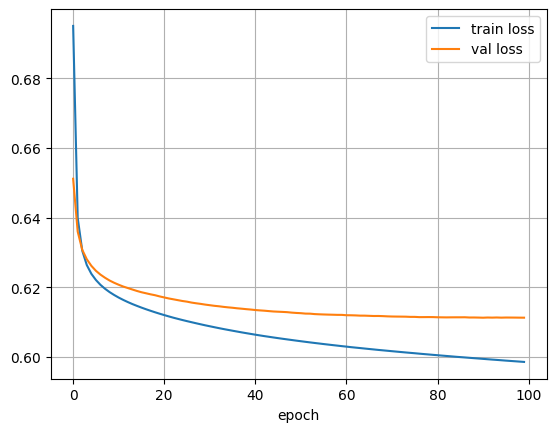

In [72]:
device = torch.device('cuda:0')
model = torch.nn.Sequential(
    torch.nn.Linear(35, 128),
    torch.nn.LeakyReLU(),
    torch.nn.Linear(128, 128),
    torch.nn.LeakyReLU(),
    torch.nn.Linear(128, 1)
).to(device)
opt = torch.optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
epochs = 100
batch_size = 512
val_loss = np.inf
patience = 0
losses = dict(
    train = [],
    val = []
)
for e in range(epochs):
    for mode in ['train', 'val']:
        train = mode == 'train'
        loss, model, opt = single_epoch(
            e, train, model, opt, eval(f'X_{mode}'), eval(f'y_{mode}_normalized'), batch_size, device
        )
        print(f'Epoch: {e} | Avg. {mode} loss: {loss}.')
        losses[mode].append(loss)
    if loss < val_loss:
        val_loss = loss
        patience = 0
        best_model = model
    else:
        patience += 1
    if patience > 20:
        print('Early stopping!')
        break

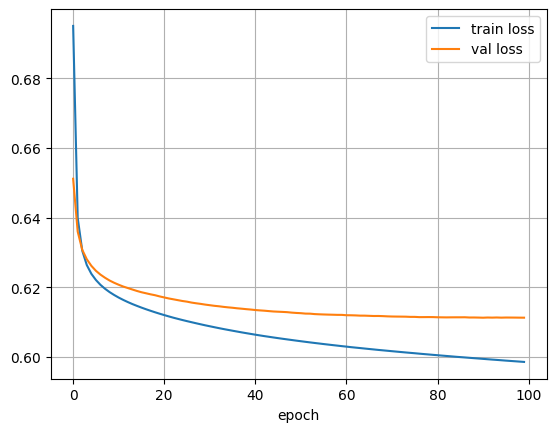

In [97]:
torch.save(
    {
        'model': model.state_dict(),
        'opt': opt.state_dict(),
        'epoch': e
    },
    '../models_out/mlp-2-layer-model.ckpt'
)
plt.plot(range(len(losses['train'])), losses['train'], label='train loss')
plt.plot(range(len(losses['val'])), losses['val'], label='val loss')
plt.xlabel('epoch')
plt.grid()
plt.legend()
plt.savefig('../figures/mlp-2-layer-train-val-loss.png')
plt.show()

In [73]:
y_val_pred = predict(model, X_val, batch_size=512, device=device)
y_test_pred = predict(model, X_test, batch_size=512, device=device)

100%|██████████| 120/120 [00:00<00:00, 2389.38it/s]


In [74]:
val_mse = F.mse_loss(input=y_val_pred, target=torch.FloatTensor(y_val_normalized.to_numpy()).to(device))
test_mse = F.mse_loss(input=y_test_pred, target=torch.FloatTensor(y_test_normalized.to_numpy()).to(device))

val_mse, test_mse

(tensor(0.6112, device='cuda:0'), tensor(0.6174, device='cuda:0'))

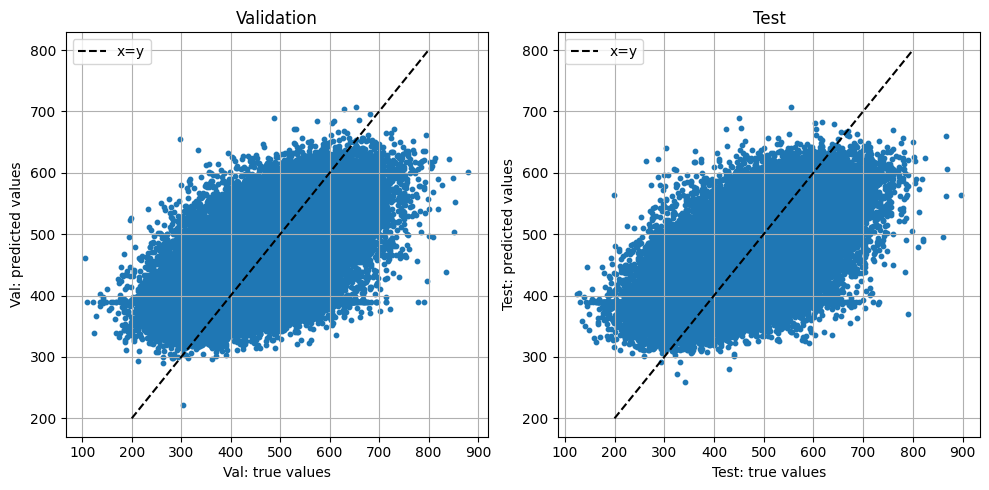

In [107]:
xy_points = np.arange(200, 800)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].scatter(y_val.to_numpy(), y_val_pred.cpu().numpy()*pv1math_std + pv1math_mean, s=10)
axes[0].plot(xy_points, xy_points, c='k', ls='--', label='x=y')
axes[0].grid()
axes[0].set_xlabel('Val: true values')
axes[0].set_ylabel('Val: predicted values')
axes[0].set_title('Validation')
axes[0].legend()

axes[1].scatter(y_test.to_numpy(), y_test_pred.cpu().numpy()*pv1math_std + pv1math_mean, s=10)
axes[1].plot(xy_points, xy_points, c='k', ls='--', label='x=y')
axes[1].grid()
axes[1].set_xlabel('Test: true values')
axes[1].set_ylabel('Test: predicted values')
axes[1].set_title('Test')
axes[1].legend()

plt.tight_layout()
plt.savefig('../figures/mlp-2-layer-val-test-scatter.png')

In [101]:
val_classes = np.zeros_like(y_val.to_numpy())
val_classes[y_val.to_numpy() >=500] = 1

test_classes = np.zeros_like(y_test.to_numpy())
test_classes[y_test.to_numpy() >=500] = 1

In [102]:
y_val_pred_unnormalized = y_val_pred.cpu().numpy() * pv1math_std + pv1math_mean
pred_val_classes = np.zeros_like(y_val_pred_unnormalized)
pred_val_classes[y_val_pred_unnormalized >= 500] = 1

y_test_pred_unnormalized = y_test_pred.cpu().numpy() * pv1math_std + pv1math_mean
pred_test_classes = np.zeros_like(y_test_pred_unnormalized)
pred_test_classes[y_test_pred_unnormalized >= 500] = 1

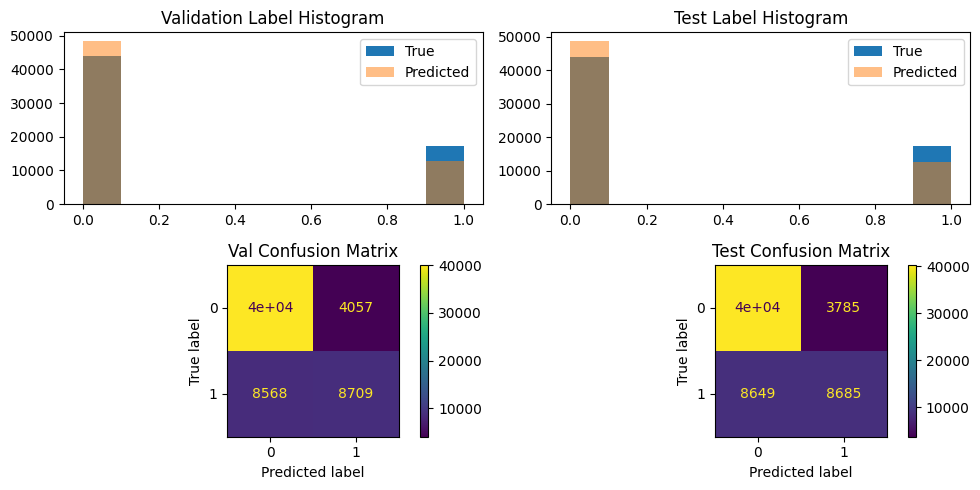

In [116]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))
conf_mat_val = confusion_matrix(
    y_true=val_classes,
    y_pred=pred_val_classes
)
disp_val = ConfusionMatrixDisplay(
    conf_mat_val
)
conf_mat_test = confusion_matrix(
    y_true=test_classes,
    y_pred=pred_test_classes
)
disp_test = ConfusionMatrixDisplay(
    conf_mat_test
)

disp_val.plot(ax=axes[1, 0])
disp_test.plot(ax=axes[1, 1])

axes[1, 0].set_title('Val Confusion Matrix')
axes[1, 1].set_title('Test Confusion Matrix')

axes[0, 0].hist(val_classes, label='True')
axes[0, 0].hist(pred_val_classes, alpha=0.5, label='Predicted')
axes[0, 0].legend()
axes[0, 0].set_title('Validation Label Histogram')

axes[0, 1].hist(test_classes, label='True')
axes[0, 1].hist(pred_test_classes, alpha=0.5, label='Predicted')
axes[0, 1].legend()
axes[0, 1].set_title('Test Label Histogram')

plt.tight_layout()
plt.savefig('../figures/mlp-2-layer-val-test-conf-matrix.png')

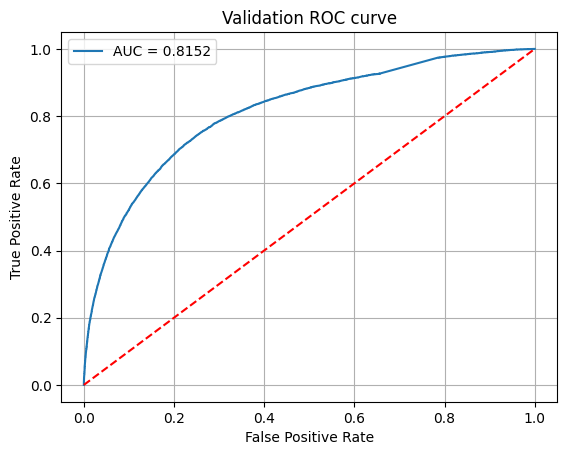

In [138]:
fpr, tpr, thresholds = roc_curve(
    y_true = val_classes,
    y_score = y_val_pred_unnormalized
)
auroc = roc_auc_score(
    y_true = val_classes,
    y_score = y_val_pred_unnormalized
)
xy_line = [0, 1]
plt.plot(fpr, tpr, label='AUC = {:.4f}'.format(auroc))
plt.plot(xy_line, xy_line, c='r', ls='--')
plt.grid()
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Validation ROC curve')
plt.savefig('../figures/mlp-2-layer-val-roc.png')

In [139]:
thresholds

array([         inf, 706.56551484, 695.28224369, ..., 320.69636861,
       320.67812464, 221.98643307])

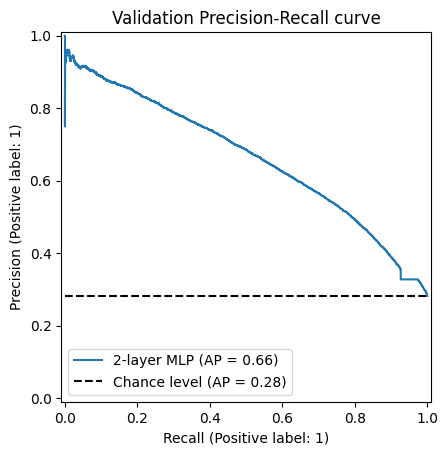

In [147]:
display = PrecisionRecallDisplay.from_predictions(
    val_classes, y_val_pred_unnormalized, name='2-layer MLP', plot_chance_level=True
)
_ = display.ax_.set_title("Validation Precision-Recall curve")
plt.savefig('../figures/mlp-2-layer-val-pr.png')

In [148]:
model

Sequential(
  (0): Linear(in_features=35, out_features=128, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=128, out_features=128, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=128, out_features=1, bias=True)
)